In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
!pip install yfinance
!pip install yahoofinancials
import yfinance as yf
import tensorflow as tf
from yahoofinancials import YahooFinancials
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import pickle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38618 sha256=69bacae6a991bd0a5deda47545f77a3e81e8e3ec7fa9bb1efaf09ff5fd9c89b1
  Stored in directory: /root/.cache/pip/wheels/c6/bc/18/da12b3c280d31beeac0c0f491c8f370da7c1473a56d7d4b5f3
Successfully built yahoofinancials


In [ ]:
import datetime as dt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from datetime import date
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

/tmp/ipython-input-3-2588756675.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed



--- Processing RELIANCE ---


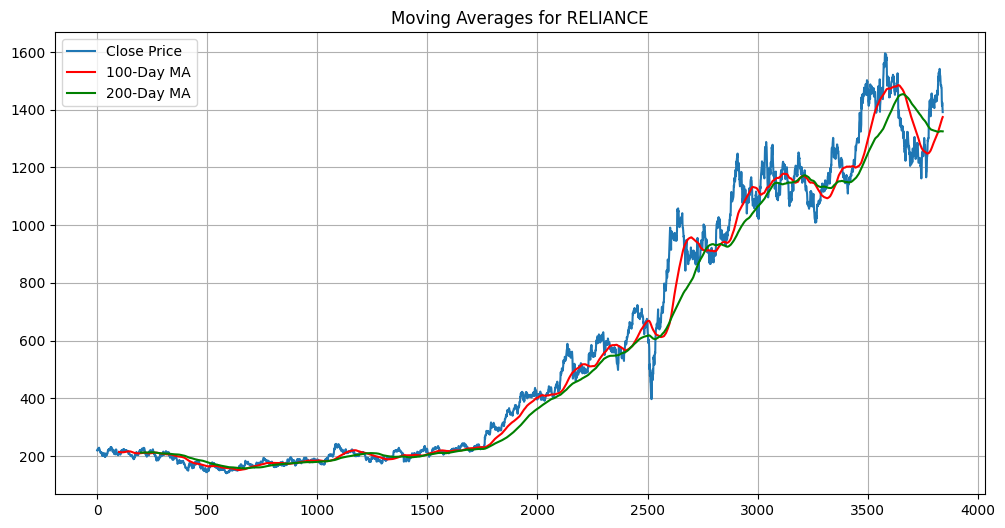

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 103ms/step - loss: 0.0307 - mean_absolute_error: 0.1123
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0042 - mean_absolute_error: 0.0378
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0033 - mean_absolute_error: 0.0344
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0031 - mean_absolute_error: 0.0332
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0031 - mean_absolute_error: 0.0321
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0028 - mean_absolute_error: 0.0321
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0030 - mean_absolute_error: 0.0324
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0034 - mean_absolute_error: 0.0321
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0027 - mean_absolute_error: 0.0319
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0026 - mean_absolute_error: 0.0285
Epoch 11/100
81/81 ━━━━━━━━

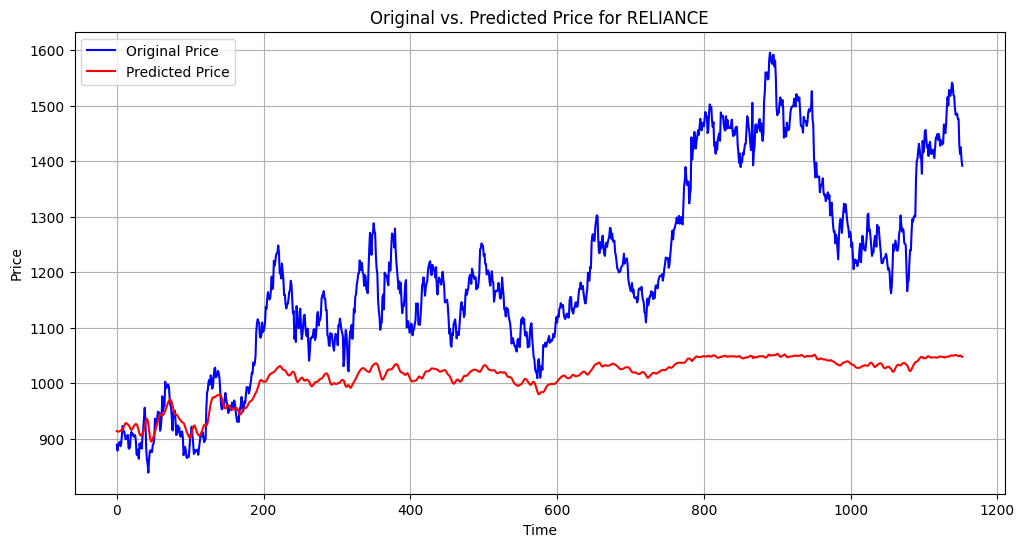

Mean absolute error on test set for RELIANCE: 15.91%
R2 score for RELIANCE: -0.7879


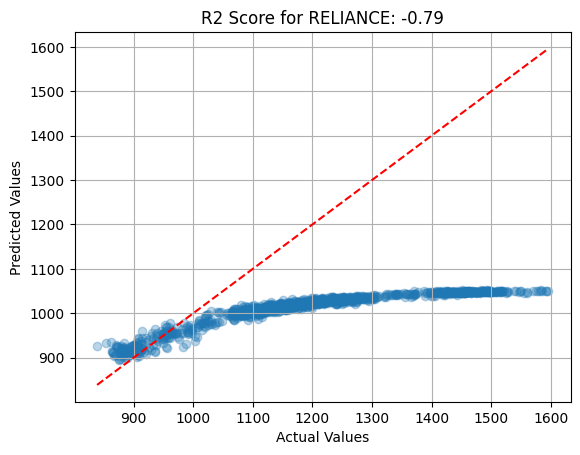

/tmp/ipython-input-3-2588756675.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


--- Processing HDFCBANK ---


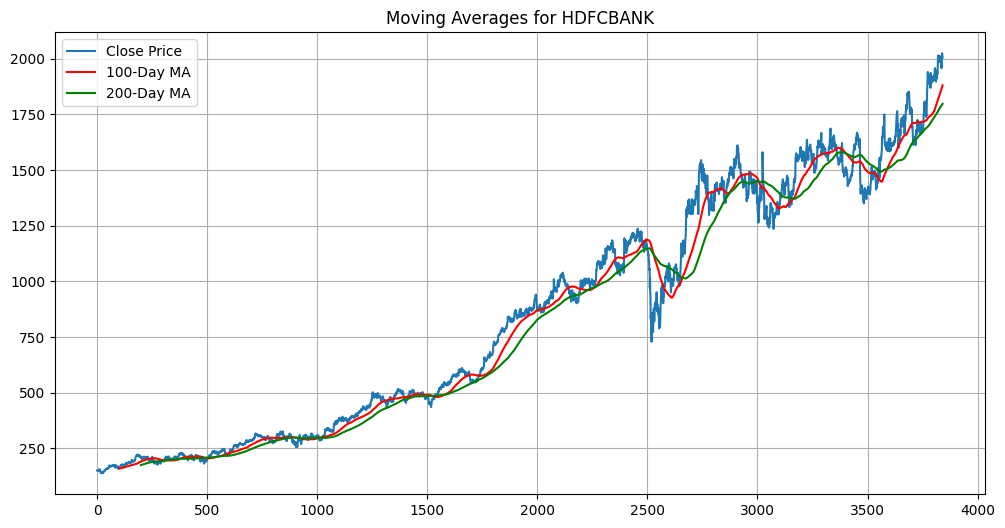

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - loss: 0.0727 - mean_absolute_error: 0.1868
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0069 - mean_absolute_error: 0.0576
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0068 - mean_absolute_error: 0.0539
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0059 - mean_absolute_error: 0.0501
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0055 - mean_absolute_error: 0.0474
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0051 - mean_absolute_error: 0.0462
Epoch 7/100


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
import pickle

#'RELIANCE', 'HDFCBANK',

stock = ['TCS']

# for reliance and hdfc stocks we will update the stock = ['RELIANCE'] and stock = ['HDFCBANK']

    data = load_data(f'{stock}.NS')
    df = data.copy() # Use .copy() to avoid SettingWithCopyWarning
    df = df.drop(['Date', 'Adj Close'], axis = 1)
    print(f"\n--- Processing {stock} ---")

    # Plotting Moving Averages
    ma100 = df.Close.rolling(100).mean()
    ma200 = df.Close.rolling(200).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df.Close, label='Close Price')
    plt.plot(ma100, 'r', label='100-Day MA')
    plt.plot(ma200, 'g', label='200-Day MA')
    plt.grid(True)
    plt.title(f'Moving Averages for {stock}')
    plt.legend()
    plt.show()

    train = pd.DataFrame(data[0:int(len(data)*0.70)])
    test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

    # Scaling Training Data
    scaler = MinMaxScaler(feature_range=(0,1))

    train_close = train.iloc[:, 4:5].values
    test_close = test.iloc[:, 4:5].values

    data_training_array = scaler.fit_transform(train_close)

    x_train = []
    y_train = []

    for i in range(100, data_training_array.shape[0]):
      x_train.append(data_training_array[i-100: i])
      y_train.append(data_training_array[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Building the LSTM Model
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units=60, activation='relu', return_sequences=True))
    model.add(Dropout(0.3))

    model.add(LSTM(units=80, activation='relu', return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(units=120, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=1))

    model.summary()

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
    model.fit(x_train, y_train, epochs=100)

    # Saving Model and Scaler (Optional, but good practice)
    model.save(f"trained_model_{stock}.h5")
    pickle.dump(scaler, open(f'scaler_{stock}.pkl', 'wb'))
    np.save(f'last_100_input_{stock}.npy', past_100_days.values)


    # Preparing Test Data for Prediction
    # It's crucial to use the scaler fitted on the training data for transforming test data.
    # To predict the next values, we need the last 100 days of the training set.
    past_100_days = pd.DataFrame(train_close[-100:])
    test_df = pd.DataFrame(test_close)

    final_df = past_100_days.append(test_df, ignore_index = True)

    input_data = scaler.fit_transform(final_df)


    x_test = []
    y_test = []

    for i in range(100, input_data.shape[0]):
      x_test.append(input_data[i-100: i])
      y_test.append(input_data[i, 0])


    x_test, y_test = np.array(x_test), np.array(y_test)

    # Making Predictions
    y_pred = model.predict(x_test)

    # Inverse transform the predictions to the original scale
    y_pred = scaler.inverse_transform(y_pred)

    # Ensure y_test has the correct shape for comparison with y_pred
    y_test = y_test.reshape(-1, 1)

    # Plotting Actual vs. Predicted Prices
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, 'b', label="Original Price")
    plt.plot(y_pred, 'r', label="Predicted Price")
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'Original vs. Predicted Price for {stock}')
    plt.legend()
    plt.grid(True)
    plt.show()


    # Evaluation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mae_percentage = (mae / np.mean(y_test)) * 100
    print(f"Mean absolute error on test set for {stock}: {mae_percentage:.2f}%")

    r2 = r2_score(y_test, y_pred)
    print(f"R2 score for {stock}: {r2:.4f}")

    # Plotting R2 Score Scatter Plot
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--') # Ideal prediction line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'R2 Score for {stock}: {r2:.2f}')
    plt.grid(True)
    plt.show()

/tmp/ipython-input-5-855154037.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-5-855154037.py:39: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop('Date', axis=1)



--- Processing TCS ---


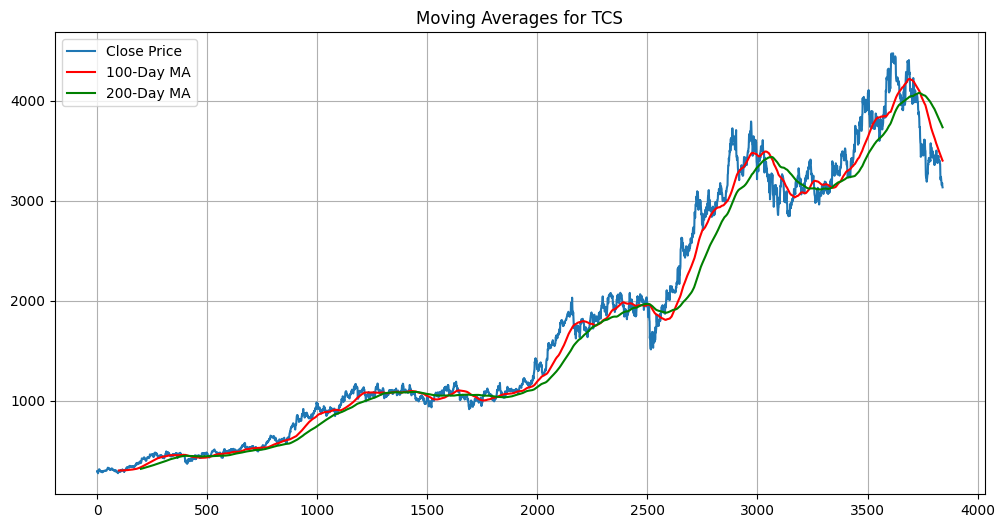

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 31s 294ms/step - loss: 0.0633 - mean_absolute_error: 0.1816
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 40s 291ms/step - loss: 0.0067 - mean_absolute_error: 0.0539
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 42s 303ms/step - loss: 0.0048 - mean_absolute_error: 0.0472
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - loss: 0.0041 - mean_absolute_error: 0.0431
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 42s 314ms/step - loss: 0.0037 - mean_absolute_error: 0.0410
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 304ms/step - loss: 0.0041 - mean_absolute_error: 0.0427
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 303ms/step - loss: 0.0044 - mean_absolute_error: 0.0445
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 311ms/step - loss: 0.0033 - mean_absolute_error: 0.0394
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 40s 304ms/step - loss: 0.0029 - mean_absolute_error: 0.0361
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 305ms/step - loss: 0.0029 - mean_absolute_error: 0.0354
Epoch 11/

NameError: name 'past_100_days' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
import pickle
import datetime as dt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from datetime import date
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

# 'RELIANCE', 'HDFCBANK',


# def load_data(stock_symbol):
#     return yf.download(stock_symbol, start="2012-01-01", end=date.today())

stock = 'TCS'
data = load_data(f'{stock}.NS')


df = data.copy()  # Use .copy() to avoid SettingWithCopyWarning
df = df.drop('Date', axis=1)
print(f"\n--- Processing {stock} ---")

# Plotting Moving Averages
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.Close, label='Close Price')
plt.plot(ma100, 'r', label='100-Day MA')
plt.plot(ma200, 'g', label='200-Day MA')
plt.grid(True)
plt.title(f'Moving Averages for {stock}')
plt.legend()
plt.show()

train = pd.DataFrame(data[0:int(len(data) * 0.70)])
test = pd.DataFrame(data[int(len(data) * 0.70): int(len(data))])

# Scaling Training Data
scaler = MinMaxScaler(feature_range=(0, 1))

train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

data_training_array = scaler.fit_transform(train_close)

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Building the LSTM Model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train, epochs=100)

# Saving Model and Scaler (Optional, but good practice)
model.save(f"trained_model_{stock}.h5")
pickle.dump(scaler, open(f'scaler_{stock}.pkl', 'wb'))
np.save(f'last_100_input_{stock}.npy', past_100_days.values)

# Preparing Test Data for Prediction
# It's crucial to use the scaler fitted on the training data for transforming test data.
# To predict the next values, we need the last 100 days of the training set.
past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)

final_df = past_100_days.append(test_df, ignore_index=True)

input_data = scaler.fit_transform(final_df)

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Making Predictions
y_pred = model.predict(x_test)



In [ ]:
# Inverse transform the predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)

# Ensure y_test has the correct shape for comparison with y_pred
y_test = y_test.reshape(-1, 1)

# Plotting Actual vs. Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_pred, 'r', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'Original vs. Predicted Price for {stock}')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print(f"Mean absolute error on test set for {stock}: {mae_percentage:.2f}%")

r2 = r2_score(y_test, y_pred)
print(f"R2 score for {stock}: {r2:.4f}")

# Plotting R2 Score Scatter Plot
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ideal prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score for {stock}: {r2:.2f}')
plt.grid(True)
plt.show()
